In [40]:
#Load Dataset
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor,LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('HW3_movie_metadata.csv')

Explore Dataset

In [41]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [42]:
df.tail()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [44]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Prepeocess data

In [45]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [46]:
low_threshold = df['imdb_score'].quantile(0.4)
high_threshold = df['imdb_score'].quantile(0.6)
def categorize_score(score):
    if score < low_threshold:
        return 0
    elif score >= high_threshold:
        return 1
    else:
        return 2
df['score_category'] = df['imdb_score'].apply(categorize_score)
df_filtered = df[df['score_category'] != 2].copy()
df_filtered.drop('imdb_score', axis=1,inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 5039
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3976 non-null   object 
 1   num_critic_for_reviews     4027 non-null   float64
 2   duration                   4059 non-null   float64
 3   director_facebook_likes    3976 non-null   float64
 4   actor_3_facebook_likes     4052 non-null   float64
 5   actor_2_name               4060 non-null   object 
 6   actor_1_facebook_likes     4066 non-null   float64
 7   gross                      3304 non-null   float64
 8   genres                     4072 non-null   object 
 9   actor_1_name               4066 non-null   object 
 10  movie_title                4072 non-null   object 
 11  num_voted_users            4072 non-null   int64  
 12  cast_total_facebook_likes  4072 non-null   int64  
 13  actor_3_name               4052 non-null   object 
 1

In [47]:
df_num = df_filtered.select_dtypes(include=[np.number])
df_num.isna().sum()

num_critic_for_reviews        45
duration                      13
director_facebook_likes       96
actor_3_facebook_likes        20
actor_1_facebook_likes         6
gross                        768
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          10
num_user_for_reviews          19
budget                       414
title_year                   100
actor_2_facebook_likes        12
aspect_ratio                 280
movie_facebook_likes           0
score_category                 0
dtype: int64

array([[<Axes: title={'center': 'num_critic_for_reviews'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'director_facebook_likes'}>,
        <Axes: title={'center': 'actor_3_facebook_likes'}>],
       [<Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'num_voted_users'}>,
        <Axes: title={'center': 'cast_total_facebook_likes'}>],
       [<Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'title_year'}>],
       [<Axes: title={'center': 'actor_2_facebook_likes'}>,
        <Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>,
        <Axes: title={'center': 'score_category'}>]], dtype=object)

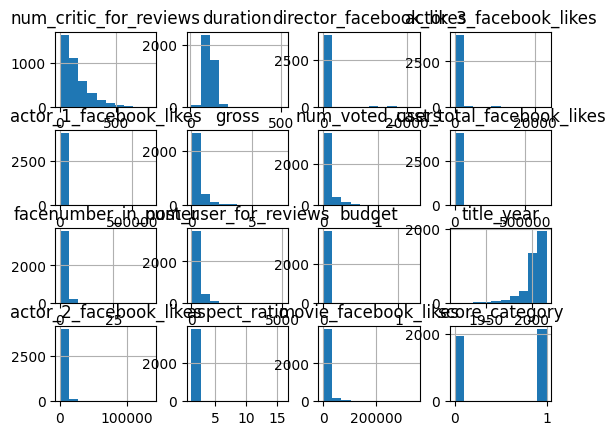

In [48]:
df_num.hist()

In [49]:
df_num.head(5)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,score_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,2.35,85000,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,2.35,164000,1
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,NaN,0,1


In [50]:
X = df_num.drop('score_category',axis=1)
X.shape

(4072, 15)

In [51]:
y = df_num['score_category'].to_numpy()
y.shape

(4072,)

array([[<Axes: title={'center': 'num_critic_for_reviews'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'director_facebook_likes'}>,
        <Axes: title={'center': 'actor_3_facebook_likes'}>],
       [<Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'num_voted_users'}>,
        <Axes: title={'center': 'cast_total_facebook_likes'}>],
       [<Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'title_year'}>],
       [<Axes: title={'center': 'actor_2_facebook_likes'}>,
        <Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>, <Axes: >]],
      dtype=object)

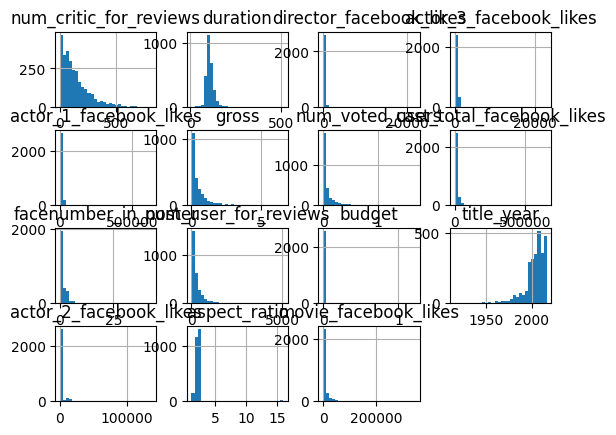

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
X_train.hist(bins=30)